#### Задача 1. Постройте график. Назовите график. Сделайте именование оси x и оси y. Сделайте выводы

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##### 1.1. Скачать следующие данные: kc-house-data 

In [7]:
df = pd.read_csv("kc_house_data.csv", sep = ',', encoding='windows-1251')
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650


##### 1.2. Изучите стоимости недвижимости

In [8]:
plt.figure(figsize=(15,6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

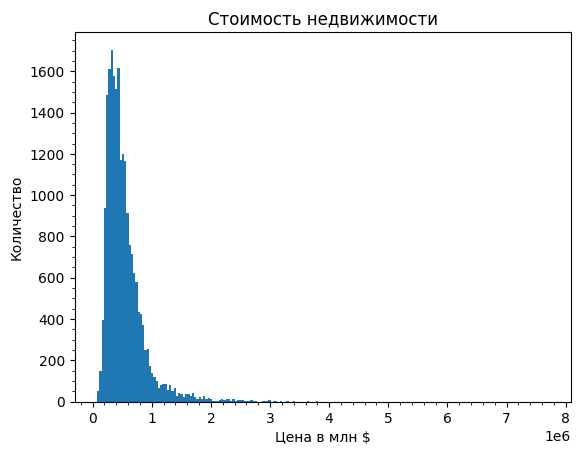

In [9]:

plt.hist(df['price'], bins=200)
plt.title("Стоимость недвижимости")
plt.xlabel("Цена в млн $")
plt.ylabel("Количество")
plt.minorticks_on();


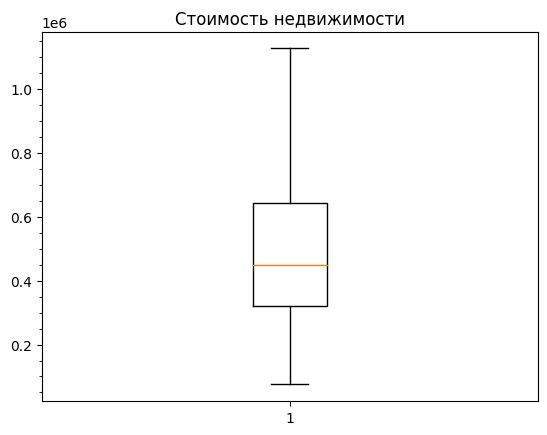

In [10]:
plt.boxplot(df['price'], showfliers= False)
plt.title("Стоимость недвижимости")
plt.minorticks_on();

#### ***Основная масса домов стоит до 1 млн. Средняя цена 450 тыс. Половина домов в ценовом диапазоне 330-650 тыс.***

##### 1.3. Изучите распределение квадратуры жилой

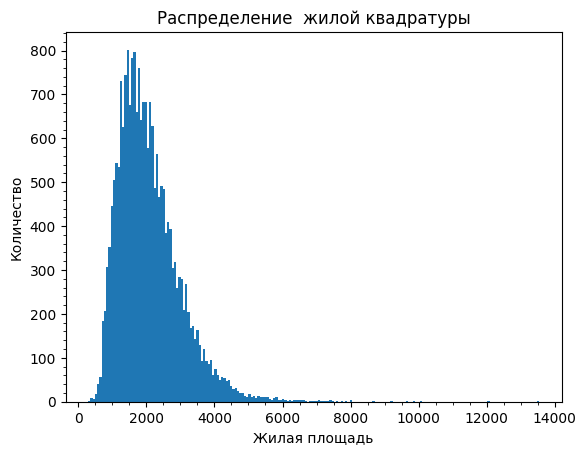

In [11]:
plt.hist(df['sqft_living'], bins=200)
plt.title("Pаспределение  жилой квадратуры")
plt.xlabel("Жилая площадь")
plt.ylabel("Количество")
plt.minorticks_on();

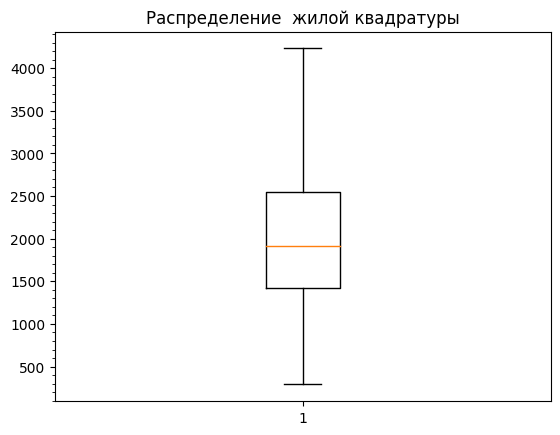

In [12]:
plt.boxplot(df['sqft_living'], showfliers= False)
plt.title("Pаспределение  жилой квадратуры")
plt.minorticks_on();

#### ***Мало домов свыше 3000 sqft. Половина домов имеет жилую площадь от 1500 до 2700 sqft.***

##### 1.4. Изучите распределение года постройки

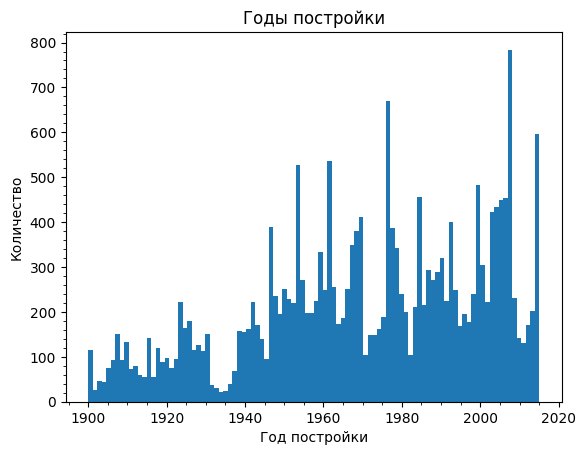

In [13]:
plt.hist(df['yr_built'], bins=100)
plt.title("Годы постройки")
plt.xlabel("Год постройки")
plt.ylabel("Количество")
plt.minorticks_on();

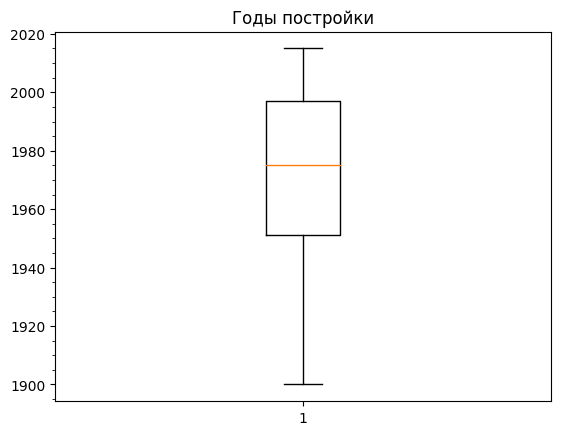

In [14]:
plt.boxplot(df['yr_built'], showfliers= False)
plt.title("Годы постройки")
plt.minorticks_on();

#### ***50% домов построено с 1955 по 2000. В 30-е годы домов сроилось мало.***

##### 2.1. Изучите распределение домов от наличия вида на набережную

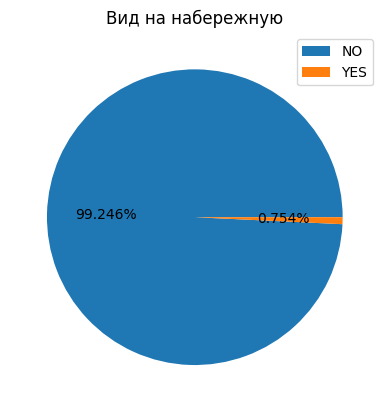

In [15]:
plt.pie((df['waterfront'].value_counts()),autopct='%.3f%%')
plt.title("Bид на набережную")
plt.legend(['NO', 'YES']);

#### ***Менее 1% домов выходят на набережную***

##### 2.2. Изучите распределение этажей домов

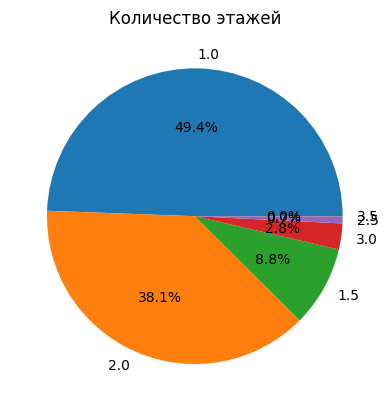

In [16]:
plt.pie((df['floors'].value_counts()),autopct='%.1f%%', labels=(df['floors'].value_counts()).index)
plt.title("Количество этажей");

#### ***Почти половина домов одноэтажные.***

#### 2.3. Изучите распределение состояния домов

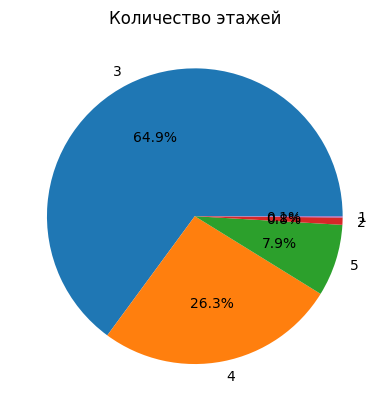

In [17]:
plt.pie((df['condition'].value_counts()),autopct='%.1f%%', labels=(df['condition'].value_counts()).index)
plt.title("Количество этажей");

#### ***2/3 домов находятся в среднем состоянии(3). Плохих домов на рынке мало.***

#### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

In [18]:
df.drop(columns=['date'], inplace= True)

In [19]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 3)
corr_matrix[np.abs(corr_matrix)< 0.03] = 0
corr_matrix


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000,0.000,0.000,0.000,0.000,-0.132,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.139
price,0.000,1.000,0.308,0.525,0.702,0.090,0.257,0.266,0.397,0.036,0.667,0.606,0.324,0.054,0.126,-0.053,0.307,0.000,0.585,0.082
bedrooms,0.000,0.308,1.000,0.516,0.577,0.032,0.175,0.000,0.080,0.000,0.357,0.478,0.303,0.154,0.000,-0.153,0.000,0.129,0.392,0.000
bathrooms,0.000,0.525,0.516,1.000,0.755,0.088,0.501,0.064,0.188,-0.125,0.665,0.685,0.284,0.506,0.051,-0.204,0.000,0.223,0.569,0.087
sqft_living,0.000,0.702,0.577,0.755,1.000,0.173,0.354,0.104,0.285,-0.059,0.763,0.877,0.435,0.318,0.055,-0.199,0.053,0.240,0.756,0.183
sqft_lot,-0.132,0.090,0.032,0.088,0.173,1.000,0.000,0.000,0.075,0.000,0.114,0.184,0.000,0.053,0.000,-0.130,-0.086,0.230,0.145,0.719
floors,0.000,0.257,0.175,0.501,0.354,0.000,1.000,0.000,0.000,-0.264,0.458,0.524,-0.246,0.489,0.000,-0.059,0.050,0.125,0.280,0.000
waterfront,0.000,0.266,0.000,0.064,0.104,0.000,0.000,1.000,0.402,0.000,0.083,0.072,0.081,0.000,0.093,0.030,0.000,-0.042,0.086,0.031
view,0.000,0.397,0.080,0.188,0.285,0.075,0.000,0.402,1.000,0.046,0.251,0.168,0.277,-0.053,0.104,0.085,0.000,-0.078,0.280,0.073
condition,0.000,0.036,0.000,-0.125,-0.059,0.000,-0.264,0.000,0.046,1.000,-0.145,-0.158,0.174,-0.361,-0.061,0.000,0.000,-0.107,-0.093,0.000


#### **Из матрицы корреляций видно, что на цену оказывают прямое влияние  *sqft_living(0.70)*,	*grade(0.67)* и *sqft_abovе (0.61).* Не оказывает влияния *long*.**

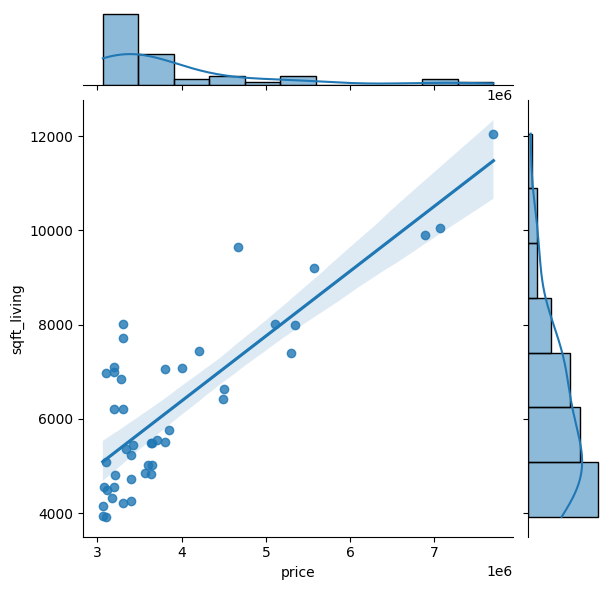

In [20]:
df_cut = df[df['price']>3000000]
sns.jointplot(x= df_cut['price'], y=df_cut['sqft_living'], kind='reg');

#### ***При стоимости дома свыше 3 млн. линейная зависимость цены от жилой площади видна очень сильно***

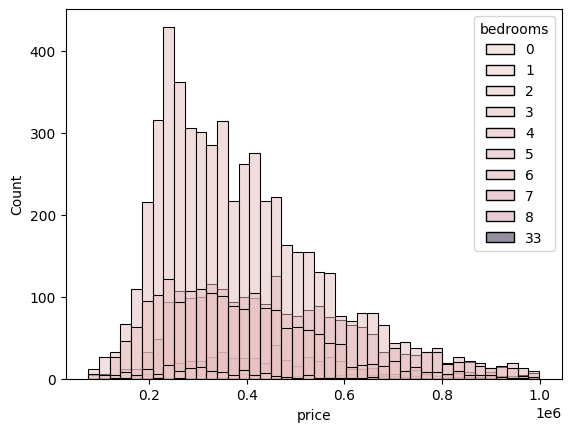

In [21]:
sns.histplot(df[(df['floors']==1) & (df['price']<1000000)], x ='price', hue ='bedrooms');


#### ***Количество дешевых одноэтажных домов уменьшается с ростом числа комнат***

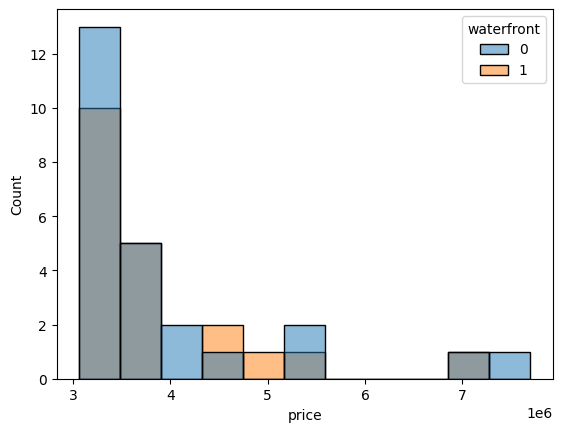

In [22]:
sns.histplot(df[df['price']>3000000], x ='price', hue ='waterfront');

 #### ***Наличие вида на набережную не оказывает влияния на цену для дорогих домов***

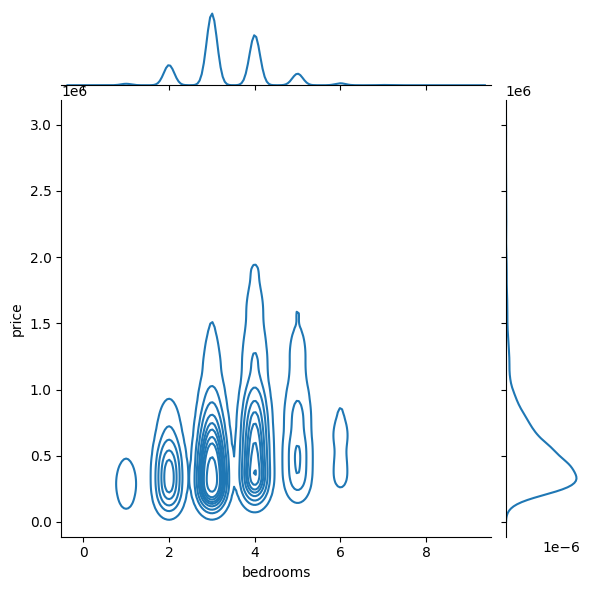

In [29]:
df_cutt = df[((df['bedrooms']<10) & (df['price']<3000000))]
sns.jointplot(x= df_cutt['bedrooms'], y=df_cutt['price'], kind='kde');

#### ***Среди домов до 3 млн. 4-х комнатные самые дорогие***